In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

df.columns = ["time", "ah", "voltage"]
df = df.drop("time", axis=1)
df["ah"] = df["ah"] * -1
df["ah"] = df["ah"].iloc[::-1].values
df["soc"] = df["ah"] / np.max(df["ah"])
df["voltage"] = df["voltage"] * 132
print(df)

            ah  voltage       soc
0    13.241678   555.72  1.000000
1    13.196567   555.72  0.996593
2    13.151592   554.40  0.993197
3    13.106780   554.40  0.989813
4    13.062186   553.08  0.986445
..         ...      ...       ...
299   0.295990   425.04  0.022353
300   0.253803   421.08  0.019167
301   0.211553   415.80  0.015976
302   0.169340   410.52  0.012788
303   0.127055   405.24  0.009595

[304 rows x 3 columns]


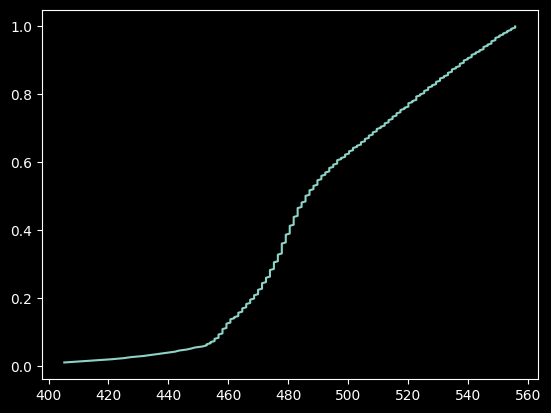

In [56]:
import matplotlib.pyplot as plt

plt.plot(df["voltage"], df["soc"])
plt.show()

In [57]:
from scipy.optimize import curve_fit

def tanh(x, a, b, c, d):
    return a * np.tanh(b * (x - c)) + d

initial_guess = [0.5, 0.001, 480, 0.5]
[a, b, c, d], _ = curve_fit(tanh, df["voltage"], df["soc"], initial_guess)
print(f"a: {a}")
print(f"b: {b}")
print(f"c: {c}")
print(f"d: {d}")
y = a * np.tanh(b * (df["voltage"] - c)) + d
quadratic_error = (y - df["soc"])**2

a: 0.5208288828722637
b: 0.025418345162304706
c: 485.0016077065276
d: 0.43763791169703486


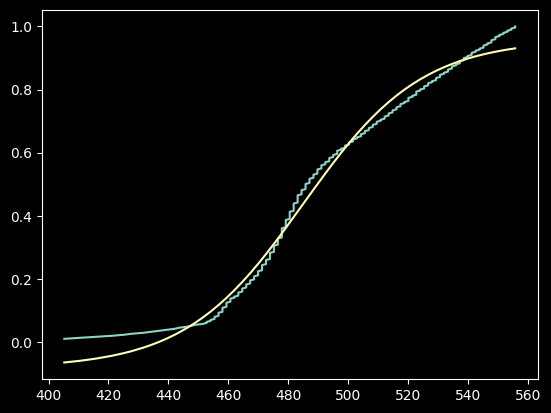

In [58]:
plt.plot(df["voltage"], df["soc"])
plt.plot(df["voltage"], y)
plt.show()

MSE: 0.0009760515555018074


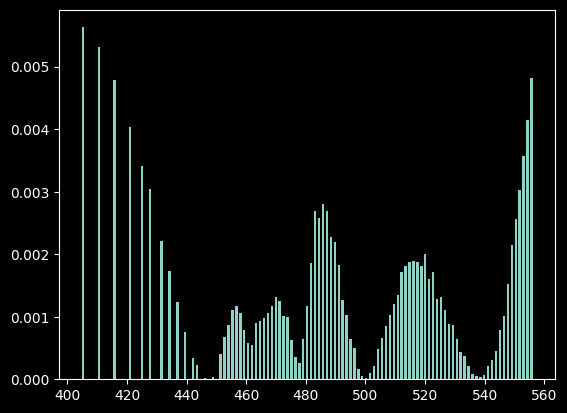

In [59]:
plt.bar(df["voltage"], quadratic_error)
print(f"MSE: {np.mean(quadratic_error)}")